
**Autor: Alexandre Esposte Santos**



O conjunto de dados desta análise pode ser encontrado no seguinte link: 

[Brazilian houses to rent](https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent?select=houses_to_rent_v2.csv)

Utilizei o conjunto houses_to_rent_v2

**Descrição dada pelo Rubens (dono do dataset):**



Dados de casas para alugar (2020)
Descrição 

Este dataset possui 10962 casas para alugar com 13 classes diferentes.

**Outliers:**
Podem conter alguns valores no dataset que são considerados outlier para analise. Tendo em vista que foi utilizado um WebCrawler apenas para pegar os dados, os mesmos estão sujeitos a problemas como erros no cadastros.



**Mudanças de dados entre as versões de dataset:**
Visto que WebCrawler foi rodado em dias diferentes para cada versão do dataset, podem haver diferenças como adição ou exclusão de casas (alem das cidades adicionadas).


--------------------------------------------------------------------------------------------------------------------------------------------------------
Eu não tenho propriedade de nenhum desses dados, todos eles foram retirados de informações disponíveis gratuitamente na internet e compilados apenas para facilitar o acesso.


## Importando bibliotecas e lendo os dados para o pandas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Realizando a leitura do dataset
arquivo = 'houses_to_rent_v2.csv'

# raw_df é apenas para armazenar os dados brutos
raw_df = pd.read_csv(arquivo)

In [ ]:
# Verificando as colunas
raw_df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [ ]:
raw_df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


Descrição das colunas:

city: Cidade onde o imóvel está localizado

area: area do imovel

rooms: numero de quartos

bathroom: numero de banheiros

parking spaces: numero de vagas

floor: andar

animal: aceita animais?

furniture: mobilhada? 

hoa: valor do condomínio

rent amount: valor do aluguel

property tax: iptu

fire insurance: Seguro incendio

total amount: Valor total (condominio + aluguel+ iptu+ seguro incendio)

## Tratando os dados

In [ ]:
# Inicialmente verificarei a quantidade da registros e se estão duplicados
print(f"Quantidade de registros: {raw_df.shape[0]}\nQuantidade de registros duplicados: {raw_df.duplicated().sum()}")

# Vamos remover as duplicatas e armazenar os dados tratados em um novo dataframe houses
houses = raw_df.drop_duplicates()

print(f"Quantidade de registros após a remoção dos duplicados: {houses.shape[0]}")


Quantidade de registros: 10692
Quantidade de registros duplicados: 358
Quantidade de registros após a remoção dos duplicados: 10334


Observamos 358 registros duplicados e logo removemos!

In [ ]:
# Vamos renomear as colunas para portugues
houses.columns = ['cidade','area','quartos','banheiros','estacionamento','andar','animal','mobilha','condominio','aluguel','iptu','seguro_incendio','total']

In [ ]:
# Agora verificaremos se existem valores faltantes
print(f"Valores faltantes:\n\n{houses.isnull().sum()}")

# Sem valores faltantes

Valores faltantes:

cidade             0
area               0
quartos            0
banheiros          0
estacionamento     0
andar              0
animal             0
mobilha            0
condominio         0
aluguel            0
iptu               0
seguro_incendio    0
total              0
dtype: int64


Observa-se que não há valores faltantes 

In [ ]:
# Vamos verificar o tipo de cada coluna
print(f"Tipo de cada coluna:\n\n{houses.dtypes}")
houses.head(2)


Tipo de cada coluna:

cidade             object
area                int64
quartos             int64
banheiros           int64
estacionamento      int64
andar              object
animal             object
mobilha            object
condominio          int64
aluguel             int64
iptu                int64
seguro_incendio     int64
total               int64
dtype: object


,cidade,area,quartos,banheiros,estacionamento,andar,animal,mobilha,condominio,aluguel,iptu,seguro_incendio,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973


Algumas colunas aparentemente tem mais sentido ser do tipo float como a area, aluguel, iptu e etc...

Só que no dataset elas já vieram num formato inteiro e por isso deixarei as mesmas no formato inteiro que o pandas inferiu.

OBS: Quando digo que no dataset já veio números inteiros eu não estou me referindo à inferência que o pandas faz para o tipo inteiro e sim que o números contidos no dataset são do conjunto dos números inteiros.

A primeira coisa que me salta aos olhos é a coluna andar ter sido inferida para o tipo object, vamos analisar o motivo disso

In [ ]:
print(f"Valores unicos da coluna andar:\n\n{houses['andar'].unique()}")

Valores unicos da coluna andar:

['7' '20' '6' '2' '1' '-' '4' '3' '10' '11' '24' '9' '8' '17' '18' '5'
 '13' '15' '16' '14' '26' '12' '21' '19' '22' '27' '23' '35' '25' '46'
 '28' '29' '301' '51' '32']


Observamos que essa coluna tem tipo object devido ao caracter '-'. Outra observação é o andar 301 que muito provavelmente foi algum erro na digitação ou na raspagem.

O maior prédio do Brasil tem 81 andares conforme link a seguir:

[Maior prédio do Brasil](https://www.viagensecaminhos.com/2017/12/maior-predio-do-brasil.html)

Está sendo construido, no Brasil, um prédio que promete ser o maior da América Latina com 290 metros e 84 andares. A matéria pode ser vista no link a seguir: 

[Novo prédio](https://veja.abril.com.br/coluna/radar/com-mais-de-300-metros-maior-predio-da-america-latina-sera-no-brasil/)

A conclusão que tiramos disso é que o valor de andar igual a 301 é um erro.

In [ ]:
# vamos identificar quais registros constam o andar '301'

display(houses.query('andar == "301" '))

print(f"\nQuantidade de registros com a cidade de BH: {houses[houses['cidade'] == 'Belo Horizonte']['cidade'].count()}")

,cidade,area,quartos,banheiros,estacionamento,andar,animal,mobilha,condominio,aluguel,iptu,seguro_incendio,total
2562,Belo Horizonte,80,3,2,2,301,acept,not furnished,750,2600,164,35,3549



Quantidade de registros com a cidade de BH: 1209


A quantidade de registros nesse dataset é de 10334 onde 1209 desses são da cidade de Belo Horizonte.

A remoção desse registro errado não impactará nas minhas análises uma vez que o dataset tem muitos registros e, também, a cidade de BH tem outros 1208 registros. 

Irei remover esse registro apenas por comodidade

In [ ]:
houses = houses.drop(houses[houses.loc[:,'andar'] == '301'].index, axis=0).copy()

print(f"Valores unicos da coluna andar:\n\n{houses['andar'].unique()}\n")

'301' in houses['andar'].unique()


Valores unicos da coluna andar:

['7' '20' '6' '2' '1' '-' '4' '3' '10' '11' '24' '9' '8' '17' '18' '5'
 '13' '15' '16' '14' '26' '12' '21' '19' '22' '27' '23' '35' '25' '46'
 '28' '29' '51' '32']



False

Agora não temos mais o registro com o andar errado

Os andares '-' representam locais que não estão em um andar especifico. Isso foi dito pelo rubens em uma das discuções do Kaggle ([Representação do andar '-'](https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent/discussion/161708?select=houses_to_rent_v2.csv))

Portanto tomarei esses registros como casas e substituirei os valores '-' para '0' e logo em seguida irei mudar o tipo da coluna para int

In [ ]:
# Alterando os valores '-' para '0'
for i in houses['andar'].index:
    if houses.loc[i,'andar'] == '-':
      houses.loc[i,'andar'] = '0'

# alterando o tipo da coluna andar
houses['andar'] = houses['andar'].astype('int')
houses.dtypes

cidade             object
area                int64
quartos             int64
banheiros           int64
estacionamento      int64
andar               int64
animal             object
mobilha            object
condominio          int64
aluguel             int64
iptu                int64
seguro_incendio     int64
total               int64
dtype: object

Uma métrica muito utilizada é o preço do aluguel por metro quadrado. Portanto, estarei criando uma nova coluna com essa métrica (p/m2).


In [ ]:
houses['p/m2'] = houses['aluguel']/houses['area']

print("Dataset pronto: \n")
houses.info()
print("\n")
houses.head()

Dataset pronto: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10333 entries, 0 to 10691
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cidade           10333 non-null  object 
 1   area             10333 non-null  int64  
 2   quartos          10333 non-null  int64  
 3   banheiros        10333 non-null  int64  
 4   estacionamento   10333 non-null  int64  
 5   andar            10333 non-null  int64  
 6   animal           10333 non-null  object 
 7   mobilha          10333 non-null  object 
 8   condominio       10333 non-null  int64  
 9   aluguel          10333 non-null  int64  
 10  iptu             10333 non-null  int64  
 11  seguro_incendio  10333 non-null  int64  
 12  total            10333 non-null  int64  
 13  p/m2             10333 non-null  float64
dtypes: float64(1), int64(10), object(3)
memory usage: 1.4+ MB




,cidade,area,quartos,banheiros,estacionamento,andar,animal,mobilha,condominio,aluguel,iptu,seguro_incendio,total,p/m2
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618,47.142857
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973,15.500000
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841,35.000000
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421,21.803922
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836,32.000000


## Parte 1: Análise geral 

Nesta etapa minha análise será focada em entender os dados e disso tentar extrair alguns insights. Também traterei os dados de forma mais incisiva uma vez que isso só é possível após uma análise mais minuciosa

In [ ]:
numerico_categorico = ['quartos','banheiros','estacionamento','andar']

categoricos_object = ['cidade','animal','mobilha']

numerico_continuo = ['area','condominio','aluguel','iptu','seguro_incendio','total','p/m2']

### Tratamento minucioso

Vamos utilizar o método describe para essas três categorias

In [ ]:
def descrever():
  print("Categorico_object: \n")
  display(houses[categoricos_object].describe().T)

  print("________________________________\n\nNumerico_categorico: \n")
  display(houses[numerico_categorico].describe().T)

  print("________________________________\n\nNumerico_continuo: \n")
  display(houses[numerico_continuo].describe().T)

descrever()

Categorico_object: 



,count,unique,top,freq
cidade,10333,5,São Paulo,5717
animal,10333,2,acept,8075
mobilha,10333,2,not furnished,7818


________________________________

Numerico_categorico: 



,count,mean,std,min,25%,50%,75%,max
quartos,10333.0,2.539921,1.168233,1.0,2.0,3.0,3.0,13.0
banheiros,10333.0,2.268751,1.414716,1.0,1.0,2.0,3.0,10.0
estacionamento,10333.0,1.644440,1.598601,0.0,1.0,1.0,2.0,12.0
andar,10333.0,5.072293,5.324279,0.0,1.0,3.0,8.0,51.0


________________________________

Numerico_continuo: 



,count,mean,std,min,25%,50%,75%,max
area,10333.0,152.446434,545.901546,11.000000,59.000000,95.0000,190.000000,46335.0
condominio,10333.0,1091.276977,11446.645671,0.000000,180.000000,571.0000,1287.000000,1117000.0
aluguel,10333.0,3966.428240,3436.330000,450.000000,1598.000000,2750.0000,5000.000000,45000.0
iptu,10333.0,376.949869,3160.754419,0.000000,41.000000,130.0000,390.000000,313700.0
seguro_incendio,10333.0,54.266138,48.166338,3.000000,21.000000,37.0000,70.000000,677.0
total,10333.0,5489.131230,12669.709466,499.000000,2116.000000,3686.0000,6913.000000,1120000.0
p/m2,10333.0,33.074672,22.480854,0.125668,18.511628,26.5625,40.322581,300.0


1. Categoricos_objetc

  1.1 Observamos que temos 5 cidades onde a mais frequente é São Paulo

  1.2 A maioria das residências aceitam pets (seria interessante analisar isso por cidade)

  1.3 A maior parte das residências não são mobiliadas


2. Numerico_categorico:

  2.1 Observamos pela mediana, média e desvio padrão que os valores em sua grande parte estão de acordo com a realidade de muitos brasileiros

  2.2 Como dito no inicio, observamos a presença de possiveis outliers analisando os quartis com os valores máximos

3. Numerico_continuo:

  3.1 Aqui fica mais evidente a existência de valores discrepantes, a média e a mediana estão bem diferentes e o 4°quartil com o max também.

  3.2 Os valores são muito discrepantes. O valor de condominio de  R$1.117.000 reais é meio surreal para mim.

Observamos, com o describe, diversos valores estranhos. Nossa tarefa agora é analisar em quais registros os mesmos ocorrem e dizer se podem estar errados o não.

In [ ]:
# Vamos começar pela quantidade de quartos
print(f"Valores unicos: {houses['quartos'].unique()}")
houses.query('quartos == 13')

Valores unicos: [ 2  4  1  3  7  5  8  6 10 13  9]


,cidade,area,quartos,banheiros,estacionamento,andar,animal,mobilha,condominio,aluguel,iptu,seguro_incendio,total,p/m2
7835,Rio de Janeiro,439,13,4,3,0,acept,not furnished,0,15000,667,229,15900,34.168565


Valores parecem estar dentro da normalidade, lembrando que 439m² é uma mansão

In [ ]:
# Vamos para os banheiros
print(f"Valores unicos: {houses['banheiros'].unique()}")
houses.query('banheiros == 10')

Valores unicos: [ 1  4  3  2  6  5  7  9  8 10]


,cidade,area,quartos,banheiros,estacionamento,andar,animal,mobilha,condominio,aluguel,iptu,seguro_incendio,total,p/m2
2055,São Paulo,998,7,10,4,0,acept,furnished,0,15000,5000,226,20230,15.030060
8187,São Paulo,700,4,10,0,0,acept,not furnished,0,15000,8750,226,23980,21.428571
9021,Belo Horizonte,458,8,10,4,0,acept,not furnished,0,7000,419,115,7534,15.283843


Todas as casas também são mansões, parece razoavel ter 10 banheiros. O curioso é uma mansão de 700m² não ter vaga na garagem

In [ ]:
# Vamos ver os estacionamentos
print(f"Valores unicos: {houses['estacionamento'].unique()}")
houses.query('estacionamento == 12')

Valores unicos: [ 1  0  7  4  2  6  3  8  5 10 12]


,cidade,area,quartos,banheiros,estacionamento,andar,animal,mobilha,condominio,aluguel,iptu,seguro_incendio,total,p/m2
4813,São Paulo,1600,4,5,12,0,acept,not furnished,1,6900,5000,104,12010,4.3125


Uma mansão! tem sentido ter muitas vagas na garagem. O possível valor errado é o de condominio.

In [ ]:
# Agora é a vez dos andares

print(f"Valores unicos: {houses['andar'].unique()}")
display(houses.query('andar == 51'))

print(f"\nAntes: {houses.shape}")
houses = houses.drop(houses.query('andar == 51').index, axis=0).copy()
print(f"\nDepois: {houses.shape}\n")

display(houses.query('andar == 51'))

Valores unicos: [ 7 20  6  2  1  0  4  3 10 11 24  9  8 17 18  5 13 15 16 14 26 12 21 19
 22 27 23 35 25 46 28 29 51 32]


,cidade,area,quartos,banheiros,estacionamento,andar,animal,mobilha,condominio,aluguel,iptu,seguro_incendio,total,p/m2
5694,Campinas,64,2,2,2,51,acept,not furnished,800,1900,129,25,2854,29.6875



Antes: (10333, 14)

Depois: (10332, 14)



,cidade,area,quartos,banheiros,estacionamento,andar,animal,mobilha,condominio,aluguel,iptu,seguro_incendio,total,p/m2


Este registro está errado e por isso foi eliminado. O maior prédio de Campinas, atualmente, tem 30 andares (busca no Google).

In [ ]:
#Agora é a vez da area

display(houses.query('area == 46335'))


,cidade,area,quartos,banheiros,estacionamento,andar,animal,mobilha,condominio,aluguel,iptu,seguro_incendio,total,p/m2
2397,Belo Horizonte,46335,4,8,5,11,acept,furnished,960,8500,646,114,10220,0.183447


São valores bem surreais para mim (46335m² é o mesmo que 5.61 campos de futebol), mas não tenho informações para dizer se esse registro está certo ou não. 

In [ ]:
# Vez do condominio
display(houses.query('condominio == 1117000'))

print(f"\nAntes: {houses.shape}")
houses = houses.drop(houses.query('condominio == 1117000').index, axis=0).copy()
print(f"\nDepois: {houses.shape}\n")

display(houses.query('condominio == 1117000'))

,cidade,area,quartos,banheiros,estacionamento,andar,animal,mobilha,condominio,aluguel,iptu,seguro_incendio,total,p/m2
255,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000,18.0



Antes: (10332, 14)

Depois: (10331, 14)



,cidade,area,quartos,banheiros,estacionamento,andar,animal,mobilha,condominio,aluguel,iptu,seguro_incendio,total,p/m2


Valor claramente errado, condominio maior que um milhão e aluguel de R$2790...

In [ ]:
# Agora o Aluguel
houses.query('aluguel == 45000')

,cidade,area,quartos,banheiros,estacionamento,andar,animal,mobilha,condominio,aluguel,iptu,seguro_incendio,total,p/m2
2182,São Paulo,700,4,7,8,0,acept,not furnished,0,45000,8750,677,54430,64.285714


Para uma mansão esse valor me parece okay.

In [ ]:
#Agora o iptu
houses.query('iptu == 313700')

,cidade,area,quartos,banheiros,estacionamento,andar,animal,mobilha,condominio,aluguel,iptu,seguro_incendio,total,p/m2
6645,São Paulo,42,1,2,1,6,not acept,not furnished,690,2500,313700,32,316900,59.52381


Valor parece okay exceto pelo IPTU.

In [ ]:
# E por último temos o preço por metro quadrado

houses[houses['p/m2']== 300.0]

,cidade,area,quartos,banheiros,estacionamento,andar,animal,mobilha,condominio,aluguel,iptu,seguro_incendio,total,p/m2
2619,São Paulo,80,2,1,1,1,acept,not furnished,875,24000,0,305,25180,300.0


24mil reais em uma área de 80 m² me parece fora do normal, mas me falta informações para dizer se isso está errado ou não. Pode ser que o valor do iptu esteja sendo considerado no aluguel.

In [ ]:
descrever()

Categorico_object: 



,count,unique,top,freq
cidade,10331,5,São Paulo,5717
animal,10331,2,acept,8074
mobilha,10331,2,not furnished,7816


________________________________

Numerico_categorico: 



,count,mean,std,min,25%,50%,75%,max
quartos,10331.0,2.540122,1.168236,1.0,2.0,3.0,3.0,13.0
banheiros,10331.0,2.268609,1.414748,1.0,1.0,2.0,3.0,10.0
estacionamento,10331.0,1.644565,1.598670,0.0,1.0,1.0,2.0,12.0
andar,10331.0,5.067951,5.305573,0.0,1.0,3.0,8.0,46.0


________________________________

Numerico_continuo: 



,count,mean,std,min,25%,50%,75%,max
area,10331.0,152.454748,545.953695,11.000000,59.000000,95.0000,190.000000,46335.0
condominio,10331.0,983.289614,3239.170163,0.000000,180.000000,571.0000,1286.500000,220000.0
aluguel,10331.0,3966.742135,3436.582991,450.000000,1594.000000,2750.0000,5000.000000,45000.0
iptu,10331.0,377.004162,3161.057941,0.000000,40.500000,130.0000,390.000000,313700.0
seguro_incendio,10331.0,54.270545,48.169874,3.000000,21.000000,37.0000,70.000000,677.0
total,10331.0,5381.506050,6347.834992,499.000000,2115.500000,3686.0000,6911.000000,316900.0
p/m2,10331.0,33.076459,22.482516,0.125668,18.515073,26.5625,40.336729,300.0


Conclusão:

Conseguimos identificar alguns registros suspeitos onde 2 eram comprovadamente errados

### Obtenção de insights

In [ ]:
houses.head()
sns.set(rc = {'figure.figsize':(18,7)})

Vamos ver quais cidades temos e a quantidade delas

São Paulo         5717
Rio de Janeiro    1431
Belo Horizonte    1207
Porto Alegre      1154
Campinas           822
Name: cidade, dtype: int64 



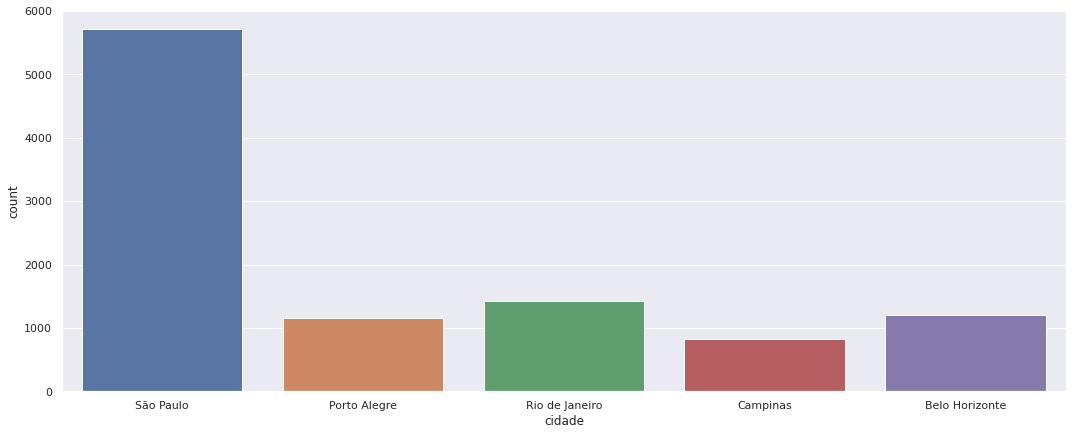

In [ ]:
# Vamos ver quais cidades temos e a quantidade delas
print(houses['cidade'].value_counts(),"\n");
sns.countplot(data = houses, x ='cidade');

Observa-se, novamente, que a maior quantidade de registros é de São Paulo. Observamos 5 cidades distintas e uma analise geral pode não ser muito representativa já que cada região tem suas características. Seria interessante realizar o estudo separando as cidades para tirar maiores conclusões.

****
Vamos ver agora a "aceitabilidade" dos locadores quando se trata de pets. 

Na primeira tabela utilizei o pivot_table para exibir os valores absolutos por cidade e na segunda utilizei o groupby para informar os valores normalizados.

In [ ]:
display(pd.pivot_table(houses, index=['cidade','animal'],values='total',aggfunc= len))
print("\nTaxas relativas:\n ")
display(houses.groupby('cidade')['animal'].value_counts(normalize=True)*100)

total
cidade         animal          
Belo Horizonte acept        899
               not acept    308
Campinas       acept        665
               not acept    157
Porto Alegre   acept        989
               not acept    165
Rio de Janeiro acept       1146
               not acept    285
São Paulo      acept       4375
               not acept   1342


Taxas relativas:
 


cidade          animal   
Belo Horizonte  acept        74.482187
                not acept    25.517813
Campinas        acept        80.900243
                not acept    19.099757
Porto Alegre    acept        85.701906
                not acept    14.298094
Rio de Janeiro  acept        80.083857
                not acept    19.916143
São Paulo       acept        76.526150
                not acept    23.473850
Name: animal, dtype: float64

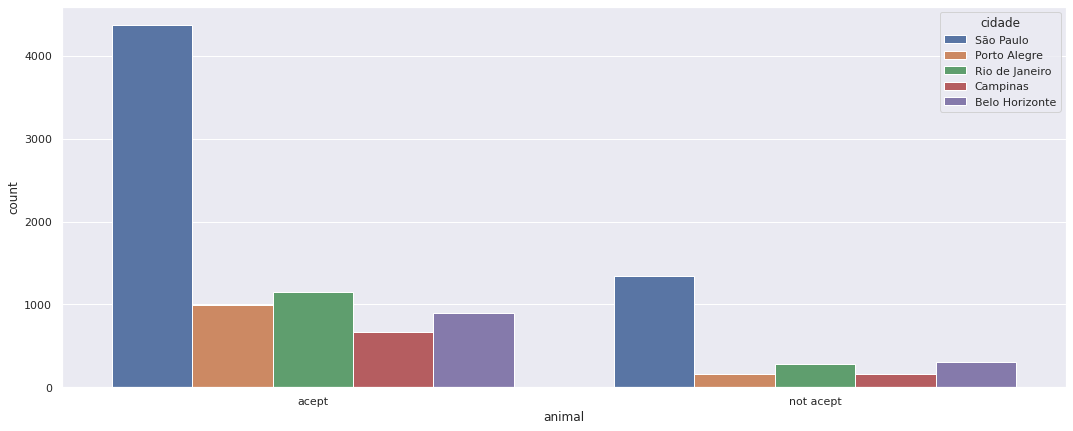

In [ ]:
sns.countplot(data= houses, x='animal',hue='cidade')

Percebe-se que a maioria dos locadores aceitam pets.

****
Agora iremos analisar a quantidade de casa mobiliadas

In [ ]:
display(pd.pivot_table(houses, index=['cidade','mobilha'],values='total',aggfunc= len))
print("\nTaxas relativas:\n ")
display(houses.groupby('cidade')['mobilha'].value_counts(normalize=True)*100)

total
cidade         mobilha             
Belo Horizonte furnished        164
               not furnished   1043
Campinas       furnished        111
               not furnished    711
Porto Alegre   furnished        294
               not furnished    860
Rio de Janeiro furnished        403
               not furnished   1028
São Paulo      furnished       1543
               not furnished   4174


Taxas relativas:
 


cidade          mobilha      
Belo Horizonte  not furnished    86.412593
                furnished        13.587407
Campinas        not furnished    86.496350
                furnished        13.503650
Porto Alegre    not furnished    74.523397
                furnished        25.476603
Rio de Janeiro  not furnished    71.837876
                furnished        28.162124
São Paulo       not furnished    73.010320
                furnished        26.989680
Name: mobilha, dtype: float64

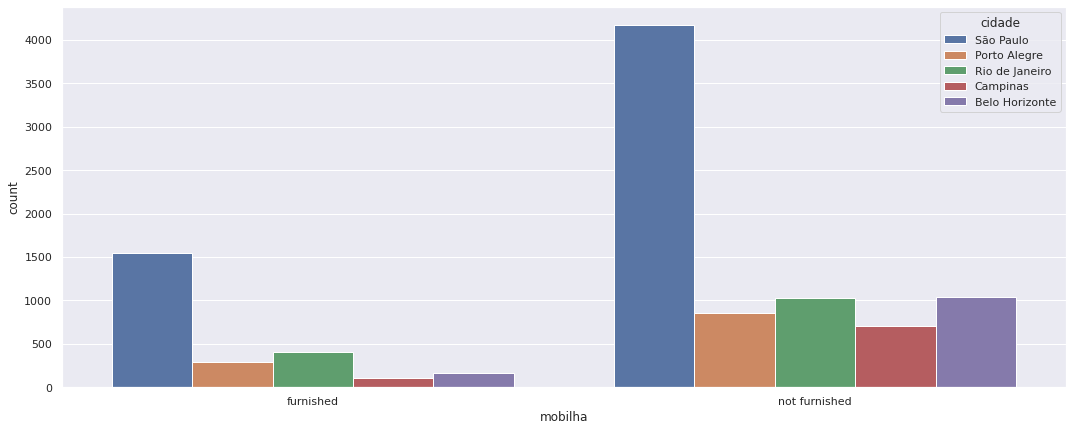

In [ ]:
sns.countplot(data= houses, x='mobilha',hue='cidade')

Vemos que uma grande parte não tem mobilias. Entretanto, em valores absolutos, ainda há muitas casas mobiliadas.

In [ ]:
pd.pivot_table(houses, index=['cidade','mobilha'],values='aluguel',aggfunc=np.median)

aluguel
cidade         mobilha               
Belo Horizonte furnished         3500
               not furnished     2200
Campinas       furnished         2200
               not furnished     1400
Porto Alegre   furnished         2200
               not furnished     1500
Rio de Janeiro furnished         3000
               not furnished     2188
São Paulo      furnished         4370
               not furnished     3100

Observamos, pela tabela acima, que a mediana do aluguel é maior para casas mobiliadas e menor para casas não mobiliadas.

****
Em qual cidade o custo de vida é maior/menor?


Mediana dos alugueis por cidade: 



,aluguel
cidade,
São Paulo,3500
Rio de Janeiro,2400
Belo Horizonte,2350
Porto Alegre,1620
Campinas,1500


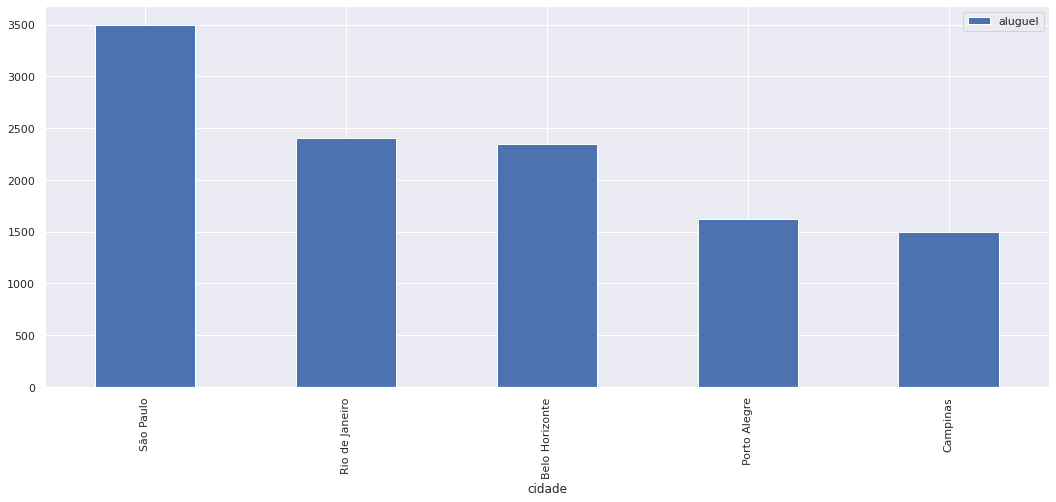

In [ ]:
print("Mediana dos alugueis por cidade: \n")
display(pd.pivot_table(data=houses,index='cidade',values='aluguel',aggfunc=np.median).sort_values(by='aluguel',ascending=False))
pd.pivot_table(data=houses,index='cidade',values='aluguel',aggfunc=np.median).sort_values(by='aluguel',ascending=False).plot.bar()

In [ ]:
# Verificando as assimetrias da distribuição do aluguel
for i in ['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas','Belo Horizonte']:
  print(f"{i} skew: {houses[houses['cidade']== i ]['aluguel'].skew()}\n")

São Paulo skew: 1.5901575493562428

Porto Alegre skew: 3.1722113651932475

Rio de Janeiro skew: 2.1732683188218496

Campinas skew: 2.491903652924448

Belo Horizonte skew: 1.6919439310352395



A cidade mais cara para se viver é em São Paulo e a mais barata Campinas.

Rio de Janeiro e Belo horizonte estão quase no mesmo patamar, sendo a diferença entre as duas de R$50 reais.

Porto Alegre e Campinas também tem um aluguel próximo, sendo a diferença de R$120 reais.

Obseva-se que todas as cidades tem assimetria à direita com relação ao preço do aluguel.

****
Abaixo temos um gráfico de correlações que nos auxiliará na investigação do aluguel

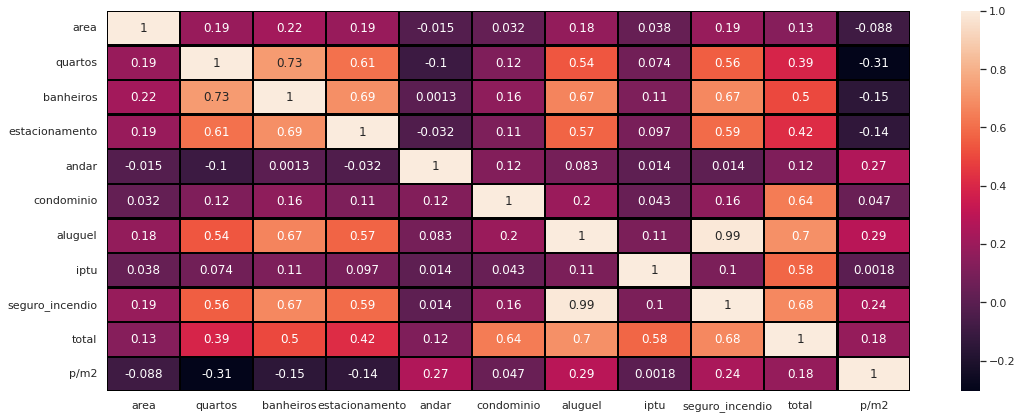

In [ ]:
sns.heatmap(houses.corr(),annot=True,linewidth=1.5,linecolor='black');

****

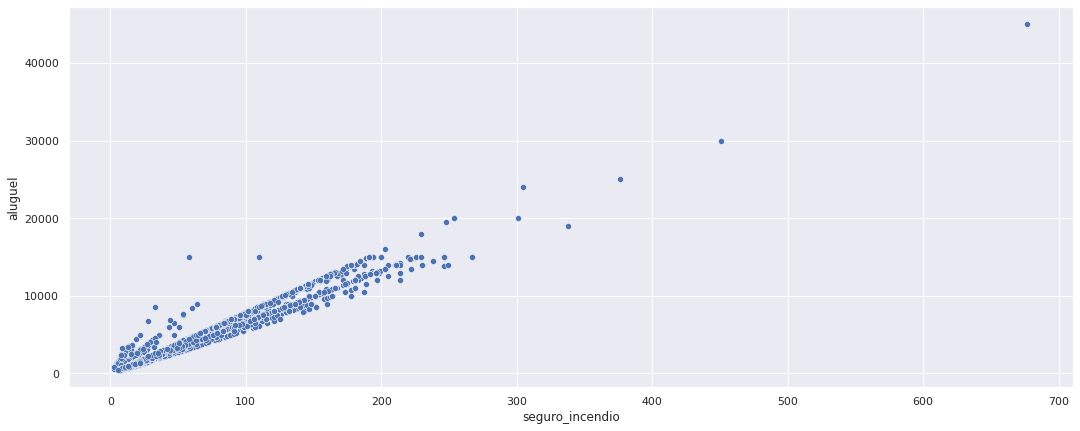

In [ ]:
sns.scatterplot(x=houses['seguro_incendio'],y=houses['aluguel']);

Temos alta correlação entre aluguel e seguro incêndio

****

In [ ]:
houses['quartos'].value_counts().sort_values(ascending=False)

3     3231
2     2881
1     2232
4     1580
5      287
6       68
7       36
8       11
10       3
13       1
9        1
Name: quartos, dtype: int64

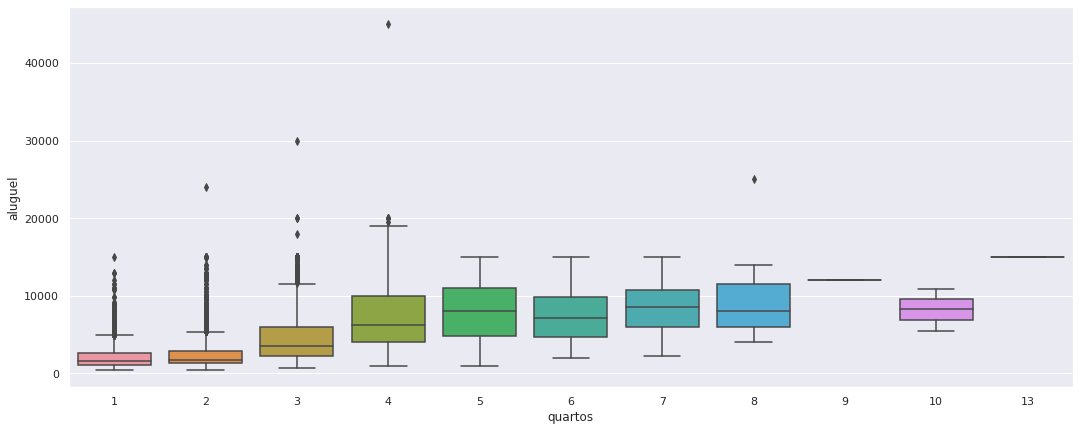

In [ ]:
sns.boxplot(data=houses,x='quartos',y='aluguel');

In [ ]:
houses['banheiros'].value_counts()

1     4020
2     2857
3     1454
4     1108
5      574
6      215
7       85
8       11
9        4
10       3
Name: banheiros, dtype: int64

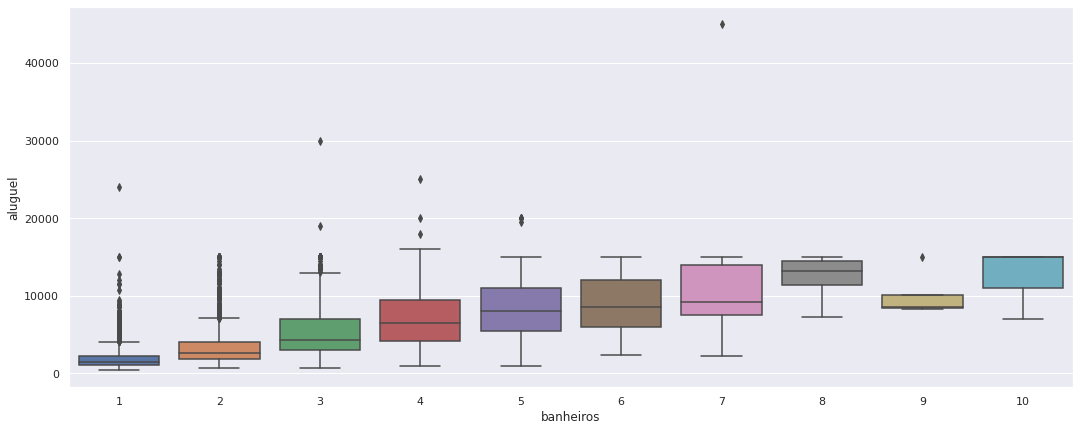

In [ ]:
sns.boxplot(data=houses,x='banheiros',y='aluguel');

In [ ]:
houses['estacionamento'].value_counts()

1     3497
0     2489
2     2044
3      964
4      787
5      228
6      163
8      123
7       33
10       2
12       1
Name: estacionamento, dtype: int64

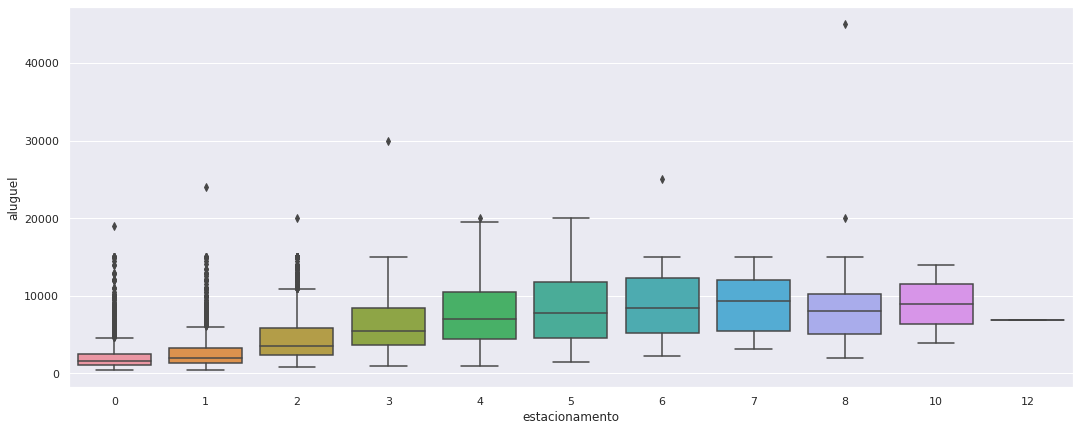

In [ ]:
sns.boxplot(data=houses,x='estacionamento',y='aluguel');

Observamos que a quantidade de quartos,banheiros e estacionamentos também estão correlacionados com o aluguel. Em suma, quanto mais banheiros, quartos e vagas na garagem maior é o aluguel.

Lembrando que quartos e banheiros são comodos, logo, para ter vários é necessário ter uma área maior. O mesmo vale para o estacionamento!

Então, ao meu ver, são features que trazem informações indiretas sobre a área da residência.

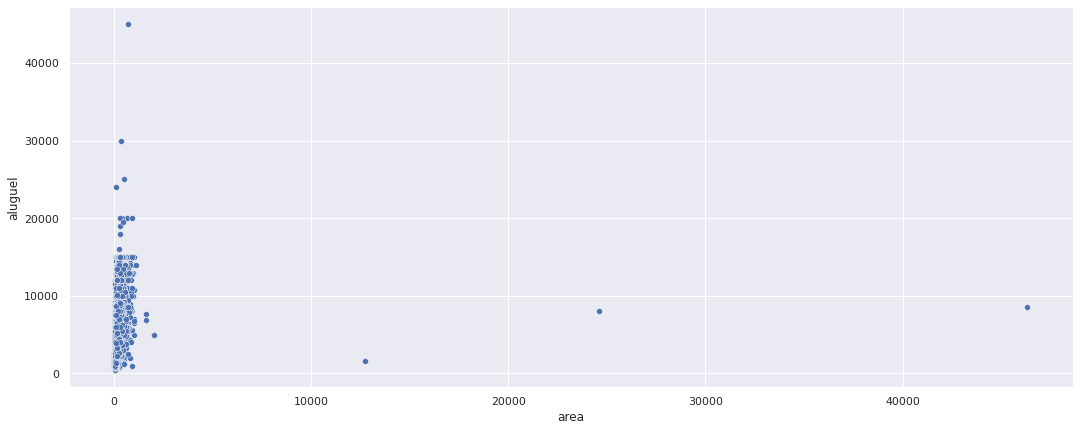

In [ ]:
sns.scatterplot(data=houses,x='area',y='aluguel');

O aluguel com a área aparenta ser uma reta

****

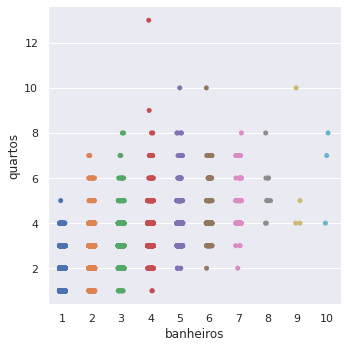

In [ ]:
sns.catplot(data=houses,y='quartos',x='banheiros');

Outra coisa é a alta correlação entre quartos e banheiros. Quanto mais banheiros mais quartos e vice e versa.

## Conclusões

1. Os locadores são bem receptiveis a animais

2. Existe uma quantidade consideravel casas para alugar que já são mobiliadas. Entretanto, a maioria das casas não são mobiliadas

3. O aluguel de casas mobiliadas é maior que o de casas não mobiliadas

4. São Paulo, Rio de Janeiro, Belo Horizonte, Porto Alegre e Campinas. As cidades estão ordenadas pela mediana do aluguel da esquerda para a direita (i.e quanto mais a esquerda mais caro é o aluguel).

5. O aluguel do Rio de Janeiro é similar ao aluguel de Belo Horizonte 

6. O aluguel de Porto Alegre é similar ao aluguel de Campinas

7. Quanto maior o seguro incêndio, maior será o aluguel

8. O aluguel é proporcional a quantidade de quartos, banheiros e estacionamentos. Em suma, o aluguel é proporcional à área da residência.

9. Existe correlação entre quantidade de banheiros e quartos. O que pode indicar suites.